# The Spark Foundation

## Graduate Rotational Inernship Program  #GRIPOCT21    #GRIPOCTUBER21

### Name: Muhammad Hassan
### Domain: Data Science and Business Aanalytics 


## Task#1 Prediction using Supervised Machine Learning
### Case predict the percentage of student based on number of study hour
#### Language Python

# Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### importing the data set from remote 

In [5]:
url = 'http://bit.ly/w-data'    #url of dataset
std_data = pd.read_csv(url)     #read data using pandas data from and method of read_csv
std_data.head()                 #head function display first 5 rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Lets go through some data analysis and see some calculation and data set inside

In [7]:
std_data.info() #info display the data set details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
std_data.describe()  #describe display some statiscal data mean media 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
std_data.columns

Index(['Hours', 'Scores'], dtype='object')

### Is there any null value in the data set 

In [9]:
std_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

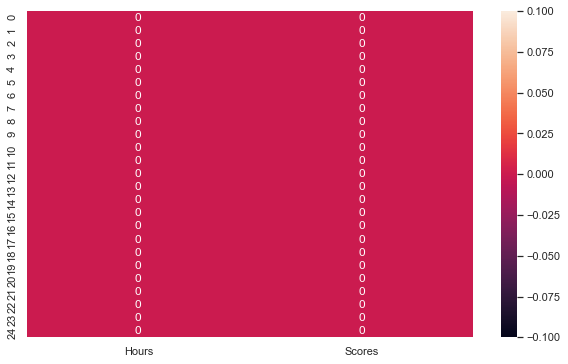

In [22]:
sns.set(rc={'figure.figsize':(10,6)})       #custom size of heatmap
sns.heatmap(std_data.isnull(), annot=True); # This heatmap will show that there is no any null value

Now its cleared that we have no any null value, we easily use ML Model

## Plot the linear Distribution of score

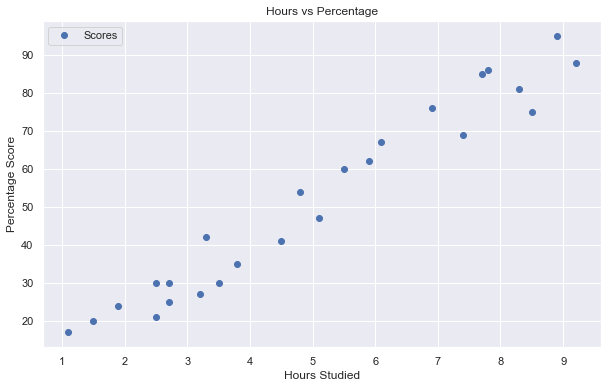

In [54]:
# Plotting the distribution of scores
std_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Above graph clearly show the postive linear relationship between the Hours and Score the more he or she studies the more score they gained.

## Feature Selections 

In [23]:
std_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [38]:
X = std_data.iloc[:, :-1].values  
y = std_data.iloc[:, 1].values  

In [40]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [41]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Now Split the data into traning and test part

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)  #Split data training data are 80% and test data are 20%

In [43]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [45]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

# Linear Regression Model 

for more information visit https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [58]:
from sklearn.linear_model import LinearRegression #importing the library

In [77]:
lg = LinearRegression(fit_intercept=True)  #Creating the object class of the model

### Training the Algorithm

In [78]:
lg.fit(X_train, y_train) # Training the data

LinearRegression()

### We will now plot the regression line

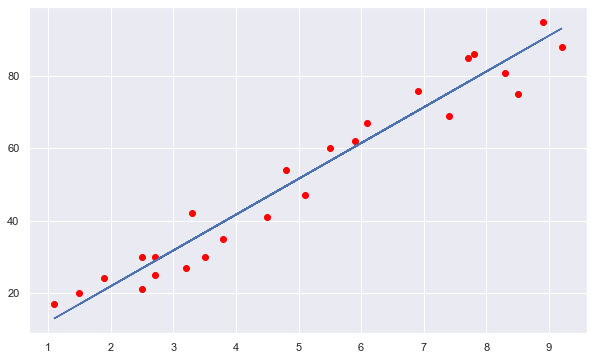

In [84]:
# Plotting the regression line
line = lg.coef_*X+lg.intercept_

# Plotting for the test data
plt.scatter(X, y, c='red')
plt.plot(X, line);
plt.show()

## Prediction of the Model

In [80]:
pred_y = lg.predict(X_test)

In [81]:
accuracy = lg.score(X_test, y_test)
print('Accuracy = ' + str(accuracy))

Accuracy = 0.9454906892105356


### Compare the Actual and Predicted Values

In [82]:
std_data_prd = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})
std_data_prd

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Now We have a Question. What will be predicted score if a student studies for 9.25 hrs/da

In [83]:

# You can also test with your own data
hours = 9.25
own_pred = lg.predict([[9.25]])
print("No of Hours = 9.25 ")
print("Predicted Score = ",own_pred)

No of Hours = 9.25 
Predicted Score =  [93.69173249]


## End